In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [59]:
df = pd.read_csv(r"E:\Data Science by SRK\PROJECTS\other_data\Classification_project\cleaned_dataset_mental_health.csv")

In [60]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,4,1,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4,0
1,4,1,4,3,0,1,0,0,0,0,0,0,0,0,4,2,5,1
2,3,2,3,3,1,0,0,0,1,1,0,1,1,0,6,5,7,2
3,4,1,4,2,1,1,1,0,1,0,0,0,0,0,3,2,2,0
4,4,3,3,3,0,0,0,0,0,0,0,1,1,1,5,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2,1,4,3,0,1,0,0,1,0,1,0,0,1,2,5,3,1
116,3,4,3,1,1,0,0,0,0,1,0,0,0,1,6,7,8,2
117,4,4,4,3,1,0,1,1,0,0,0,1,0,1,1,5,3,0
118,4,4,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sadness              120 non-null    int64
 1   Euphoric             120 non-null    int64
 2   Exhausted            120 non-null    int64
 3   Sleep dissorder      120 non-null    int64
 4   Mood Swing           120 non-null    int64
 5   Suicidal thoughts    120 non-null    int64
 6   Anorxia              120 non-null    int64
 7   Authority Respect    120 non-null    int64
 8   Try-Explanation      120 non-null    int64
 9   Aggressive Response  120 non-null    int64
 10  Ignore & Move-On     120 non-null    int64
 11  Nervous Break-down   120 non-null    int64
 12  Admit Mistakes       120 non-null    int64
 13  Overthinking         120 non-null    int64
 14  Sexual Activity      120 non-null    int64
 15  Concentration        120 non-null    int64
 16  Optimisim            120 n

In [62]:
df.isnull().sum()

Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

# X and y

In [63]:
X = df.drop(columns = ['Expert Diagnose'])
y = df['Expert Diagnose']

# Train_test_split

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state= True)

# Gradient Boost

**Applying Hyperparameter Tuning for identiying best parameters for Gradient Boost**

In [65]:
from sklearn.model_selection import GridSearchCV

# modelling

from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()

# parameters grid
param_grid_gb = {"n_estimators" : [1,5,10,20],
                'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]}

# grid search
grid_gb = GridSearchCV(estimator_gb, param_grid_gb, cv = 5, scoring = 'accuracy')
grid_gb.fit(X_train, y_train)

# best parameters for GradientBoostingClassifier model
grid_gb.best_params_

{'learning_rate': 0.4, 'n_estimators': 10}

# Gradient Boost model importance feature

In [66]:
feats_gb = pd.DataFrame(data = grid_gb.best_estimator_.feature_importances_,
                       index = X.columns, 
                       columns = ['Importance'])
imp_features_list_gb = feats_gb[feats_gb['Importance']>0].index.to_list()
imp_features_list_gb

['Sadness',
 'Euphoric',
 'Exhausted',
 'Sleep dissorder',
 'Mood Swing',
 'Suicidal thoughts',
 'Anorxia',
 'Authority Respect',
 'Try-Explanation',
 'Aggressive Response',
 'Ignore & Move-On',
 'Nervous Break-down',
 'Overthinking',
 'Sexual Activity',
 'Concentration',
 'Optimisim']

# Gradient Boost Classifier

**with imp features and imp parameters**

In [67]:
# important input variables
X_imp = X[imp_features_list_gb]

# train test split
#X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp, y, test_size = 0.2, random_state = True)
# modelling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.5)
gb.fit(X_train_gb, y_train_gb)

# Evaluation on train data
ypred_train_gb = gb.predict(X_train_gb)

from sklearn.metrics import accuracy_score
print("Train_accuracy : ", accuracy_score(y_train_gb, ypred_train_gb))

# cross validation
from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(gb, X_train_gb, y_train_gb, cv = 5).mean())

# Evaluation
ypred_test_gb = gb.predict(X_test_gb)
print("Test_accuracy : ", accuracy_score(y_test_gb, ypred_test_gb))


Train_accuracy :  1.0
cross_val_score :  0.7610526315789473
Test_accuracy :  0.7916666666666666


In [68]:
%%timeit
gb.fit(X_train_gb, y_train_gb)


97.7 ms ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Final model

In [69]:
gb = GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.5)


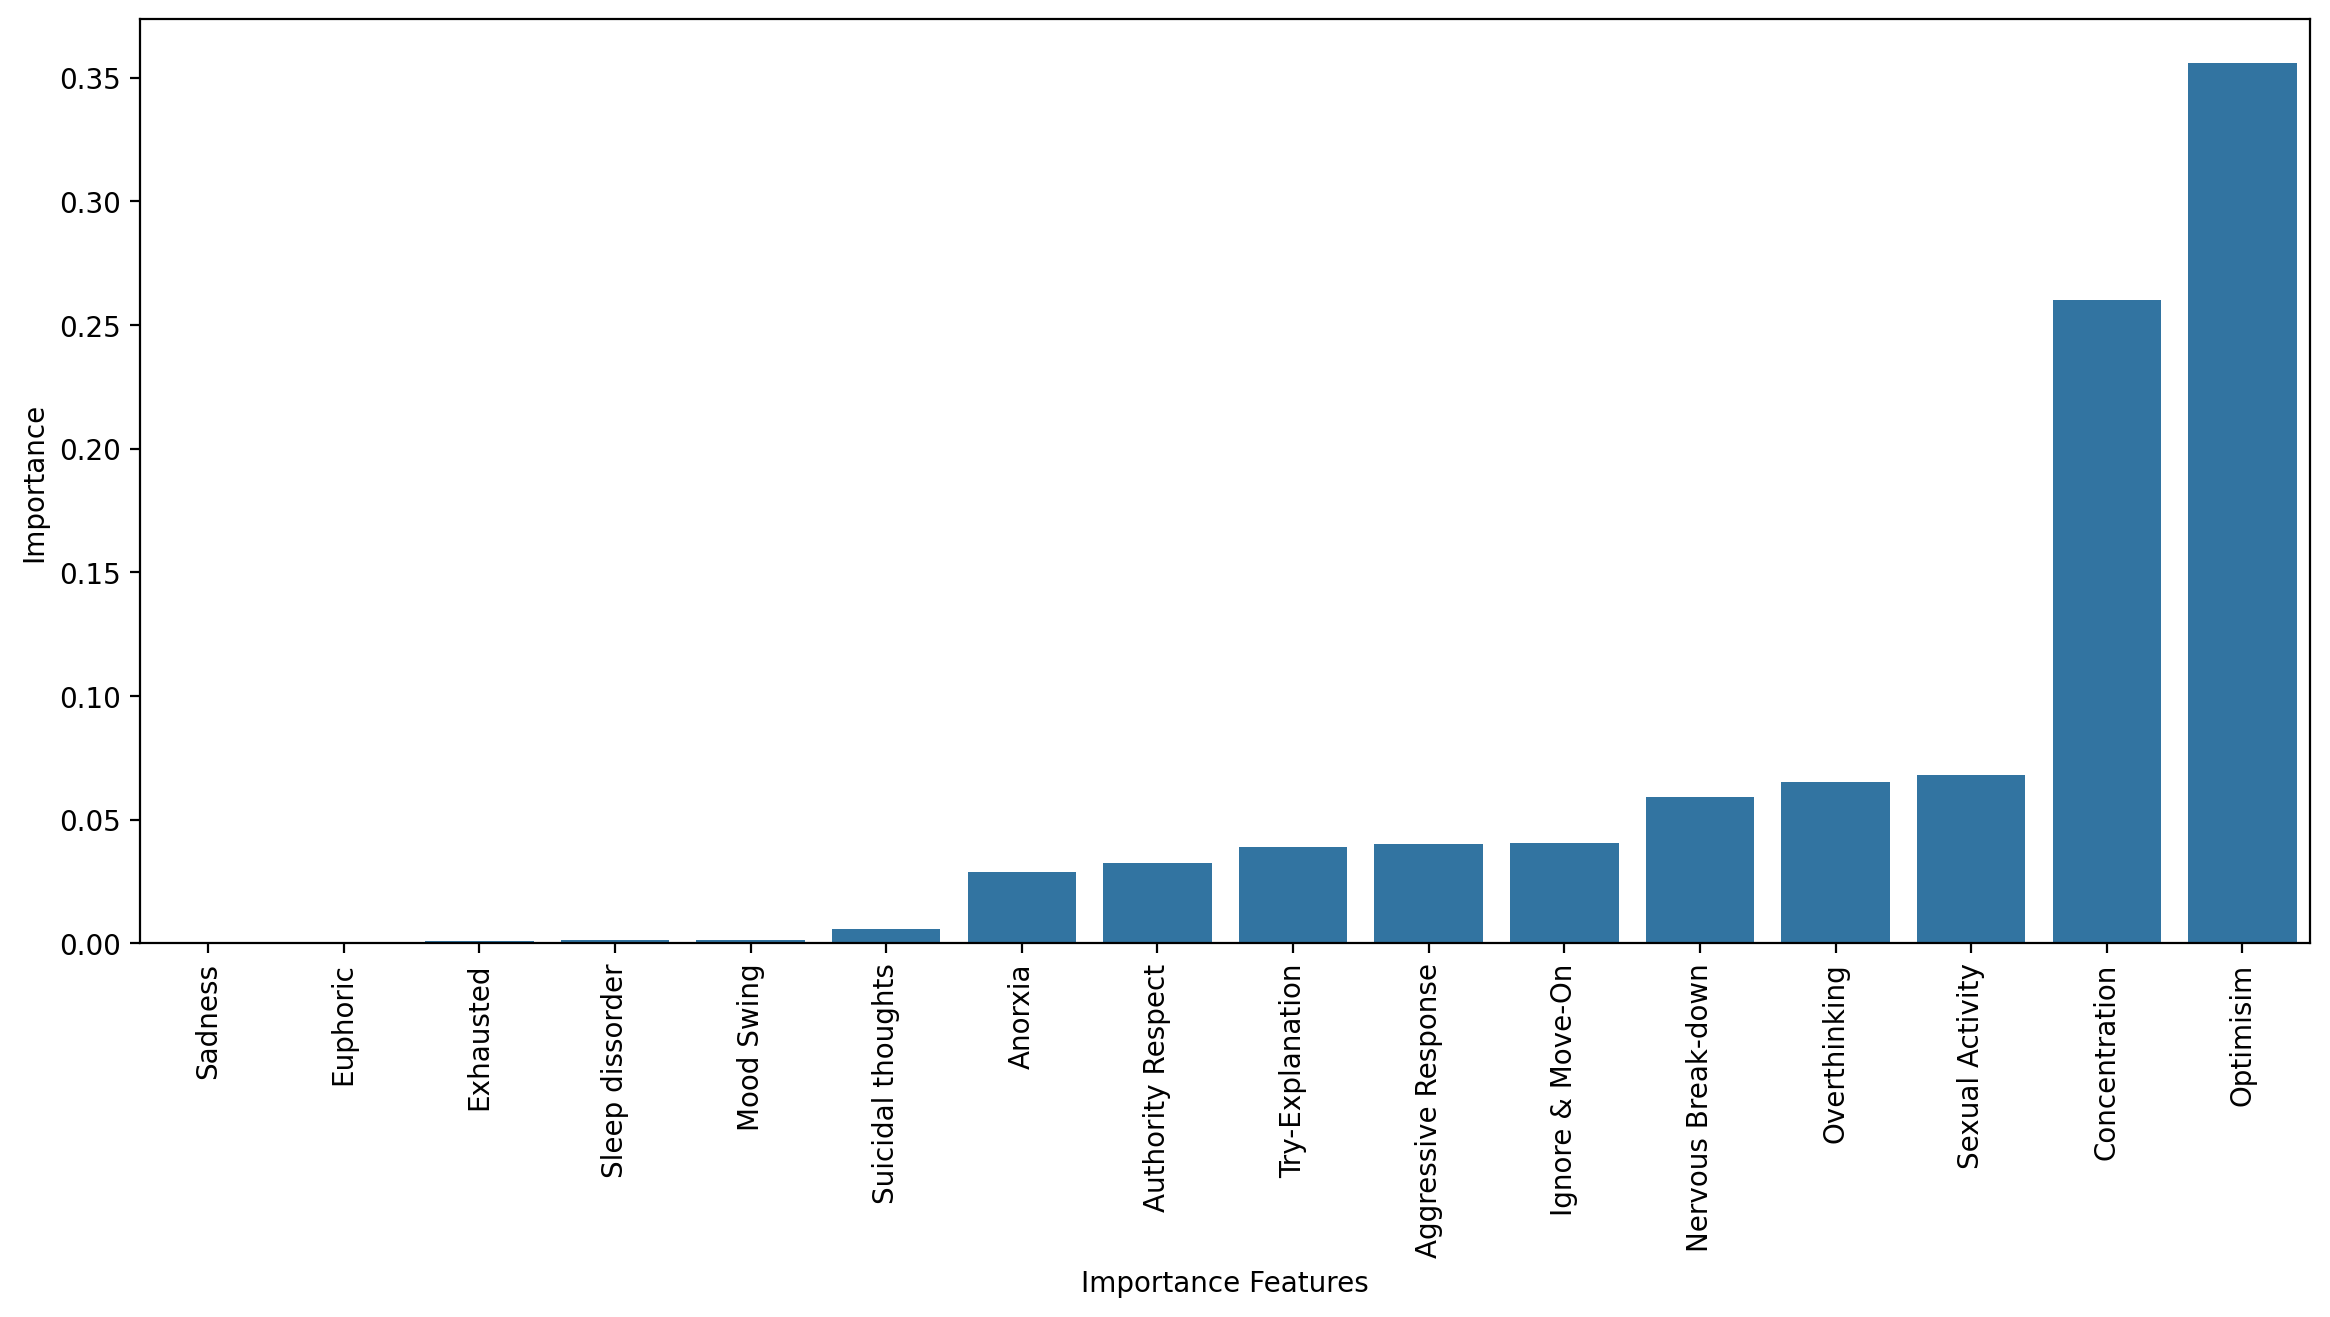

In [70]:
plt.figure(figsize = (14,6), dpi = 200)

sns.barplot(data = feats_gb[feats_gb['Importance'] > 0].sort_values('Importance'),
           x = feats_gb[feats_gb['Importance'] > 0].index,
           y = 'Importance')
plt.xticks(rotation = 90)
plt.xlabel('Importance Features')
plt.show()

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_gb, ypred_test_gb)

array([[8, 0, 0, 0],
       [0, 2, 0, 0],
       [1, 0, 5, 1],
       [0, 1, 2, 4]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test_gb, ypred_test_gb))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.67      1.00      0.80         2
           2       0.71      0.71      0.71         7
           3       0.80      0.57      0.67         7

    accuracy                           0.79        24
   macro avg       0.77      0.82      0.78        24
weighted avg       0.79      0.79      0.78        24

